<a href="https://colab.research.google.com/github/heber-augusto/udacity-azure-ml-foudations/blob/master/lab_import_transform_and_export_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This jupyter notebook was created to compare the effort of doing machine learing tasks without Azure Machine Learning Studio's tools.

The goal at this notebook is to read, combine and do some transformation with 3 datasets:

 - crime-dirty (https://introtomlsampledata.blob.core.windows.net/data/crime-data/crime-dirty.csv);
 - crime-spring (https://introtomlsampledata.blob.core.windows.net/data/crime-data/crime-spring.csv);
 - crime-winter (https://introtomlsampledata.blob.core.windows.net/data/crime-data/crime-winter.csv).

This notebook demonstrate:

1. Getting the dataset and creating dataframe from csv file;
1. Presents some dataset explorations to undestand data;
1. Guarantee some column type consistency;
1. Combine 3 datasets adding rows;
1. Removing missing values and presents some final output datas.

The output feature from this dataset is the TotalAmount


**The cell bellow contains some libraries and some essencial defines for the tasks**

*   pandas: create a dataframe from csv file, change column types, combine dataframes and clean missing data;
* matplotlib: plot some results.



In [10]:
import pandas as pd
import matplotlib.pyplot as plt


url1="https://introtomlsampledata.blob.core.windows.net/data/crime-data/crime-dirty.csv"
url2="https://introtomlsampledata.blob.core.windows.net/data/crime-data/crime-spring.csv"
url3="https://introtomlsampledata.blob.core.windows.net/data/crime-data/crime-winter.csv"





**Step 1: Getting the dataset and creating dataframe from csv file**

The pandas library has a method which does this: read_csv()

So we will use it and pass the url 

In [11]:
crime_dirty = pd.read_csv(url1,header=1, sep='|', delimiter='|')
crime_spring = pd.read_csv(url2)
crime_winter = pd.read_csv(url3)


**Step 2: Some dataset explorations to understand data**

The following 2 cells presents:
 
*  Some basic statics information (using dataframe describe method)
method);
*  Some values distribution using hist method;
*  Count number of missing values for each column (using isnan).

A lot of others analysis can be done but I will list just this methods outputs.



In [12]:
crime_dirty.describe()

,ID,IUCR,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.000000e+01,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000e+00,9.000000e+00,10.0,9.000000,9.000000
mean,1.014006e+07,1008.700000,1263.400000,13.222222,29.500000,32.300000,1.157454e+06,1.898273e+06,2015.0,41.876613,-87.697370
std,4.098057e+02,435.055565,633.147552,6.098725,14.167647,23.281132,1.405204e+04,3.773324e+04,0.0,0.103645,0.051257
min,1.013970e+07,460.000000,524.000000,5.000000,9.000000,1.000000,1.129230e+06,1.826485e+06,2015.0,41.679311,-87.800175
25%,1.013976e+07,662.500000,845.750000,9.000000,18.000000,13.750000,1.152687e+06,1.879658e+06,2015.0,41.825501,-87.715029
50%,1.013983e+07,975.000000,1118.000000,12.000000,30.500000,28.500000,1.160997e+06,1.901632e+06,2015.0,41.885610,-87.685233
75%,1.014035e+07,1317.500000,1592.500000,16.000000,40.000000,53.000000,1.167370e+06,1.932394e+06,2015.0,41.970100,-87.659550
max,1.014087e+07,1811.000000,2431.000000,24.000000,49.000000,63.000000,1.172409e+06,1.946271e+06,2015.0,42.008124,-87.644545


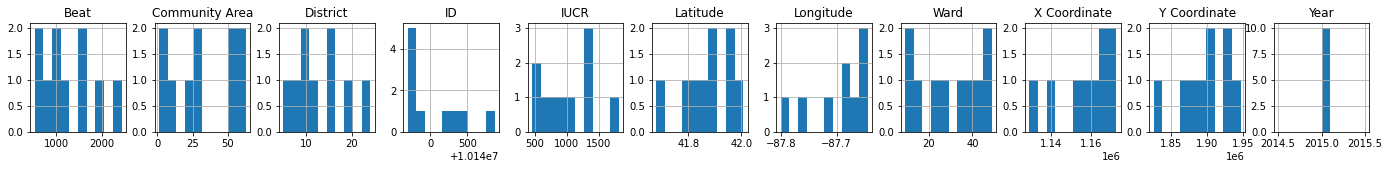

In [22]:
columns = ['ID','IUCR','Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate',	'Year', 'Latitude','Longitude']
sub_plts = crime_dirty[columns].hist(
    figsize=(24, 2),
    layout =(1, len(columns)) 
    )


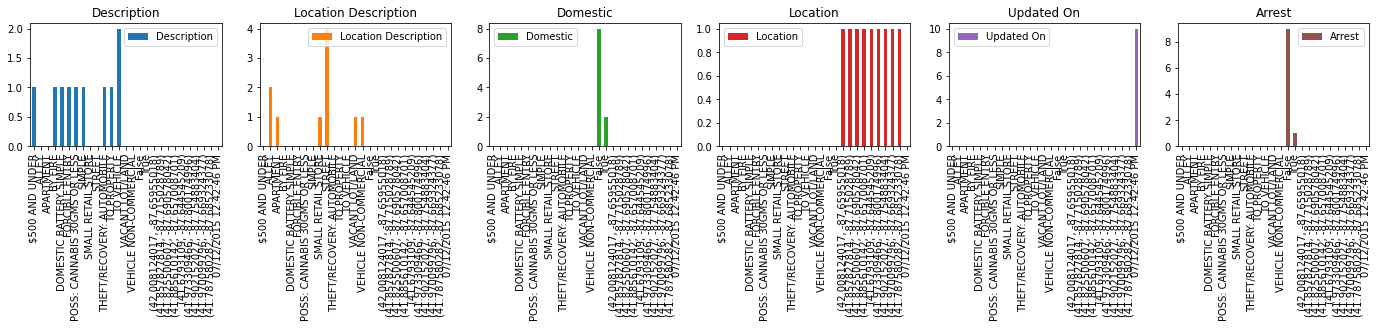

In [30]:
# hist method fail for string columns so, as oriented at the link bellow, I used
# plot method with bar kind and 
# https://stackoverflow.com/questions/14992644/turn-pandas-dataframe-of-strings-into-histogram
string_columns = ['Description', 'Location Description', 'Domestic', 'Location', 'Updated On', 'Arrest']
sub_plts= crime_dirty[string_columns].apply(pd.value_counts).plot(
    kind='bar', 
    subplots=True, 
    figsize=(24, 5), 
    layout =(2, len(string_columns)))


In [24]:
#Show the number of missing values at each column
crime_dirty.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                1
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            1
Y Coordinate            1
Year                    0
Updated On              0
Latitude                1
Longitude               1
Location                1
dtype: int64

**Setp 3: Guarantee some column type consistency;**

For the splitting task we will use train_test_split scikit-learn method
The dataframe was splitted considering 70% of it for trainning and the rest to evaluate the results.


In [31]:
crime_dirty['FBI Code']  = crime_dirty['FBI Code'].astype(str)
crime_spring['FBI Code'] = crime_spring['FBI Code'].astype(str)
crime_winter['FBI Code'] = crime_winter['FBI Code'].astype(str)

**Step 4: Combine 3 datasets adding rows**

Simple rows addition using some pandas operations


In [38]:
add_result1 = crime_winter.append(crime_spring, ignore_index = True)
add_result2 = add_result1.append(crime_dirty, ignore_index = True)



**Step5: Removing missing values and presents some final output datas**
This cell uses some dataframes methods to count number of na values, 
calculate mean and fill na values with it.


In [73]:
nan_count_values = add_result2.isna().sum()
number_of_rows   = len(add_result2.index)
min_threshold = 0.1
max_threshold = 0.5
# check for threashold limits and replace nan values with mean
for column in ['X Coordinate', 'Y Coordinate']:
    number_of_nan_values = nan_count_values[column]
    # calculate nan values ratio to check threshold
    nan_values_ratio = number_of_nan_values / number_of_rows
    if (nan_values_ratio > min_threshold) and \
      (nan_values_ratio < max_threshold):
        add_result2[column] = add_result2[column].fillna(
            add_result2[column].mean())
  

In [74]:
add_result2.describe()

,ID,IUCR,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,3.000000e+01,30.000000,30.000000,29.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,30.000000,20.000000,20.000000
mean,1.034787e+07,1210.733333,1253.700000,12.551724,24.333333,41.733333,1.162684e+06,1.884247e+06,2015.666667,41.838015,-87.678575
std,1.599503e+05,1011.414269,640.851543,6.367250,14.355903,24.002778,1.175663e+04,2.890606e+04,0.479463,0.098176,0.052716
min,1.013970e+07,460.000000,413.000000,4.000000,1.000000,1.000000,1.129230e+06,1.826485e+06,2015.000000,41.679311,-87.800175
25%,1.014041e+07,667.500000,824.000000,8.000000,12.500000,24.000000,1.159826e+06,1.866753e+06,2015.000000,41.757966,-87.705269
50%,1.037945e+07,975.000000,1076.000000,11.000000,22.500000,48.500000,1.162684e+06,1.884247e+06,2016.000000,41.831472,-87.679083
75%,1.051240e+07,1153.750000,1696.750000,17.000000,36.250000,62.500000,1.166287e+06,1.899071e+06,2016.000000,41.906668,-87.653893
max,1.053506e+07,5002.000000,2522.000000,25.000000,49.000000,77.000000,1.192434e+06,1.946271e+06,2016.000000,42.008124,-87.570656


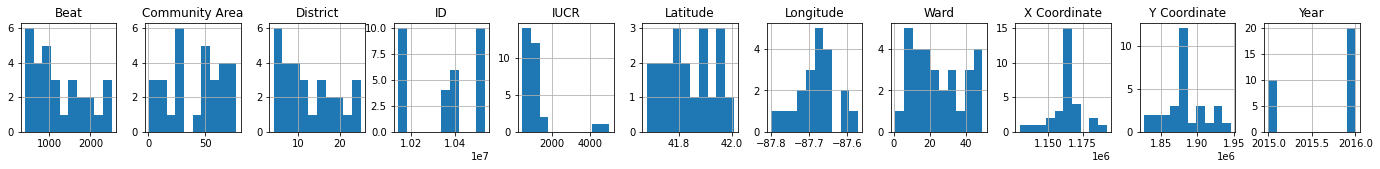

In [75]:
columns = ['ID','IUCR','Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate',	'Year', 'Latitude','Longitude']
sub_plts = add_result2[columns].hist(
    figsize=(24, 2),
    layout =(1, len(columns)) 
    )